In [34]:
import torch
import numpy as np
import pandas as pd

from IPython.display import YouTubeVideo

# General information
PyTorch functions a lot like NumPy. It has a well written documentation and their website contains tutorials aswell. Taking a look at the documentation will often clarify your questions.

Link to documentation: https://pytorch.org/docs/stable/torch.html

# A short recap on ndarray dimensions

Lets say we have a table consisting of 4 columns and 5 rows.

|time|x|y|z|
|:--|:--|:--|:--|
|0|5|10|15|
|1|6|11|16|
|2|7|12|17|
|3|8|13|18|
|4|9|14|19|

We are going to load this table into NumPy and take a look at the dimensions. This is done by loading the table in Pandas and creating a NumPy ndarray from it.

In [35]:
df = pd.read_excel("appendix/example_table.xlsx")
df

,time,x,y,z
0,0,5,10,15
1,1,6,11,16
2,2,7,12,17
3,3,8,13,18
4,4,9,14,19


In [36]:
array = df.to_numpy()
array

array([[ 0,  5, 10, 15],
       [ 1,  6, 11, 16],
       [ 2,  7, 12, 17],
       [ 3,  8, 13, 18],
       [ 4,  9, 14, 19]])

In [37]:
array.shape

(5, 4)

Notice how we have a shape of `rows` by `columns`. Selecting the $y$ value in the 4th row (13) is done by.

In [38]:
array[3,2] # [row index, column index], counting starts from 0.

13

## Expanding dimensions
Let the above table contain the position of person 1 in the $x, y, z$ direction. Within our dataset we have multiple persons. Each person moves in a different direction. It may be desired to load each single table into one ndarray. One of the requirements to do this is that each table has the same shape. Lets visualize the table of person 1 as cubes. Each cube has the value of the respective element within the table.

<centre><img src="appendix\tensor1_axis.png" width="200"></centre>

Notice how the previously selected cell has been highlighted. 

We load 2 more tables and put them sequantially infront of our first table.

<centre><img src="appendix\tensors_axis_tables.png" width="300"></centre>

At this point our ndarray has 3 axis, `[table index, row index, column index]`. To access value 13 we use `array[0,3,2]` and to select value 52 within table 3 we use `array[2,3,2]`.

It is possible to expand the dimensions further to e.g. `array[block, table, row, column]`. Within this representation each block might contain certain groups of persons.

## From matrix to tensor

Where NumPy uses vectors and matrices, PyTorch uses tensors. We can intrepret tensors roughly the same way as the n-dimensional matrix shown above. 

<centre><img src="appendix\matrix_to_tensor.png" width="300"></centre>

To visually give you an idea of the difference, see the above figure. Within this figure a matrix element is changed to a tensor element. This tensor element contains the element value on each side of the cube. In general: 


<b>NumPy $\rightarrow$ PyTorch</b>  
Scalar $\rightarrow$ 0D tensor  
Vector $\rightarrow$ 1D tensor  
2D Matrix $\rightarrow$ 2D tensor  
3D Matrix $\rightarrow$ 3D tensor   

    
    
The mathematics of tensors goes beyong the scope of this notebook. If you do want to read more on tensors see: https://en.wikipedia.org/wiki/Tensor#As_multidimensional_arrays

# Constructing tensors
Construct an empty 5x3 (rows x columns) tensor with data type long.  


In [39]:
x = torch.empty(5,3)
x

tensor([[1.6069e+16, 3.0704e-41, 1.4982e+29],
        [4.5661e-41, 1.6827e+16, 3.0704e-41],
        [1.6827e+16, 3.0704e-41, 1.4713e+29],
        [4.5661e-41, 2.2177e+24, 4.5661e-41],
        [1.3452e-43, 0.0000e+00, 1.1210e-43]])

In [40]:
x.shape

torch.Size([5, 3])

The shape is just as excpected. Note that the array is not actually empty. See the PyTorch documentation for more details (https://pytorch.org/docs/stable/generated/torch.empty.html#torch.empty).

We can create a tensor directly from a Python array.

In [41]:
y = [0,1,2,3,4,5]
y = torch.tensor(y)
y

tensor([0, 1, 2, 3, 4, 5])

In [42]:
y.shape

torch.Size([6])

In [43]:
y.dtype

torch.int64

Torch detects the data types automatically and transforms them to its own tensor data type (dtype).  
int64 $\rightarrow$ torch.int64

We can create a Tensor directly from a NumPy ndarray.  

In [44]:
z = np.array([0,1,2,3,4,5]) # construct ndarray from Python array
z = torch.from_numpy(z)
z

tensor([0, 1, 2, 3, 4, 5])

In [45]:
z.dtype

torch.int64

Sometimes it's desirable to manually set the data type of the tensor contents. This is either done by changing the data type of an exsisting tensor.

In [46]:
z = z.float() # set the dtype to float32
z

tensor([0., 1., 2., 3., 4., 5.])

In [47]:
z.dtype

torch.float32

In [48]:
z = z.double() # converts dtype to float64
z.dtype

torch.float64

Notice how `.float()` creates a float32. Often this is accurate enough. Be carefull however, sometimes you do really need float64 in scientific computing. If you do not run into memory issues and you do not need to worry about memory allocation, use float64 precision. Better safe than sorry, right?  

For more information see the `torch.Tensor` documentation.

Remember our Excel sheet? Lets make it a tensor.

In [49]:
df = pd.read_excel("appendix/example_table.xlsx")
ndarray = df.to_numpy()

tensor = torch.from_numpy(ndarray)
tensor

tensor([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])

or

In [50]:
tensor = torch.from_numpy(pd.read_excel("appendix/example_table.xlsx").to_numpy())
tensor

tensor([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])

In [51]:
tensor.shape

torch.Size([5, 4])

# Tensor operations

We can do tensor operations that comply with the rules of tensor algebra. What does this mean? We can perform operations with or on tensors, so the outcome is another tensor. Lets create two tensors `x` and `y` with shape 3x3.

In [52]:
x = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
]) # note the notation [[row1], [row2], [row3]]

y = torch.tensor([[10,11,12],[13,14,15],[16,17,18],])

x.shape, y.shape

(torch.Size([3, 3]), torch.Size([3, 3]))

In [53]:
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [54]:
y

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

Lets perform some tensor operations.

In [55]:
x+y

tensor([[11, 13, 15],
        [17, 19, 21],
        [23, 25, 27]])

In [56]:
x.add(y)

tensor([[11, 13, 15],
        [17, 19, 21],
        [23, 25, 27]])

In [57]:
torch.add(x,y)

tensor([[11, 13, 15],
        [17, 19, 21],
        [23, 25, 27]])

Three different methods to do addition. Which one is best? Is there a best?

## Reshaping tensors
To resize or reshape tensors use `torch.view`

In [58]:
x # remember the shape is 3x3

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Flatten the tensor

In [59]:
x.view(-1), x.view(-1).shape # printing the outputs in one line

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [60]:
x.view(9), x.view(9).shape # flatten the tensor, knowing the total tensor entries equals 9

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

Add extra dimension

3x3 $\rightarrow$ 1x9

In [61]:
x.view(-1, 9), x.view(-1, 9).shape

(tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]]), torch.Size([1, 9]))

3x3 \rightarrow 1x3x3

In [62]:
x.view(-1, 3, 3), x.view(-1, 3, 3).shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

# Why Pytorch instead of NumPy?

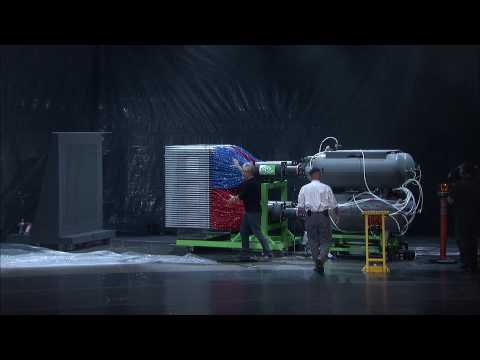

In [63]:
YouTubeVideo("-P28LKWTzrI", width=800, height=600)

# Run tensor calculations GPU
One of the beauties of PyTorch is the ability to move tensors to the GPU. This allows for computations to be done on the GPU instead of the CPU. PyTorch uses CUDA to run computations on GPUs. CUDA functions as an interface between regular (CPU) programming and GPU accelerated programming. Note that CUDA only works on NVIDIA GPUs. The connection between Python, PyTorch and a GPU is as follows.

Python $\Leftrightarrow$ PyTorch $\Leftrightarrow$ c++ $\Leftrightarrow$ CUDA $\Leftrightarrow$ GPU

Luckily you do not need to be able to work with CUDA yourself. We will be programming in Python and simply tell PyTorch to use one or multiple GPUs for computation.

For more information on CUDA see https://developer.nvidia.com/cuda-zone and https://en.wikipedia.org/wiki/CUDA.

To monitor hardware usage in a Linux environment use e.g. `top` and `nvidia-smi -l 1` in seperate terminals. The latter is recommended when choosing devices. In a multi-user environment it usefull to choose a GPU that is not in use by someone else.

In [64]:
!nvidia-smi

Fri Oct 16 11:08:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:05:00.0 Off |                  N/A |
| 29%   29C    P8    31W / 250W |     11MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:09:00.0 Off |                  N/A |
| 29%   30C    P8    39W / 250W |     11MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

## Warning!
<font color='red'><b>Make sure to shutdown your notebook (or stop your server in "Control Panel") when you are no longer using the GPU! This frees up resources.<b></font>

# Tensors on GPU
We have seen how to create tensors. By default the computations are performed on CPU. We have to move individual tensors to GPU, before computations using those tensors can be performed on GPU.

## Initialization of CUDA
First we have to check if CUDA is available. This will be the case when your system has CUDA installed and has one or multiple GPUs with CUDA support.

In [65]:
# CUDA initialisation
ngpu = torch.cuda.device_count() # number of available gpus
device = torch.device("cuda:0") if (torch.cuda.is_available() and ngpu > 0) else "cpu" #cuda:0 for gpu 0, cuda:4 for gpu 5

Look up the functions `torch.cuda.device_count()` and `torch.cuda.is_available()` in the PyTorch documentation to see what they do.

With the device initialised, we can transfer tensors to our chosen device.

In [66]:
# create tensors and move them to device
x = torch.rand(3,3, device=device)
y = torch.rand(3,3).to(device) # Two different methods to move tensor to device

In [67]:
y

tensor([[0.7925, 0.1217, 0.9874],
        [0.0153, 0.8363, 0.3112],
        [0.8710, 0.5111, 0.7765]], device='cuda:0')

Notice how the tensor output contains the device. 

In [68]:
x+y

tensor([[1.4600, 0.4167, 1.3083],
        [0.5334, 1.7540, 0.9028],
        [1.6701, 1.2647, 1.2917]], device='cuda:0')

Notice in your resource monitor how these tensors are stored in VRAM (video memory) of the used GPU. To move a tensor from GPU to CPU use the following. Notice how the memory allocation changes from VRAM to RAM. 

*Windows: resource monitor/task manager, Linux: top / nvidia-smi

In [69]:
a = x.detach().cpu() # detach x from gpu, move x to cpu
b = y.detach().cpu()

a

tensor([[0.6675, 0.2950, 0.3209],
        [0.5181, 0.9177, 0.5916],
        [0.7992, 0.7535, 0.5152]])

In [70]:
a+b

tensor([[1.4600, 0.4167, 1.3083],
        [0.5334, 1.7540, 0.9028],
        [1.6701, 1.2647, 1.2917]])

Tensors have to be on the same device when performing computations.

In [74]:
x = torch.rand(3,3).to("cuda:0")
y = torch.rand(3,3).to("cpu")

x+y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

Congratulations, you are now able to work with tensors and use them to either perform computations on CPU or on GPU!

# Stop the Jupyter kernel
This frees up system resources.